<a href="https://colab.research.google.com/github/musawenkosikhulu/Aesthetics-and-visualizations/blob/main/AIMS_DS_2022_DT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monday 3rd Jan 2022

Decision tree practical

On the left, click on the folder icon and upload the pima_data.csv file.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Read in the data

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima_data.csv", header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
len(pima)

768

## Create X and y variables (features and target)

In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [8]:
X

,pregnant,insulin,bmi,age,glucose,bp,pedigree,skin
0,6,0,33.6,50,148,72,0.627,35
1,1,0,26.6,31,85,66,0.351,29
2,8,0,23.3,32,183,64,0.672,0
3,1,94,28.1,21,89,66,0.167,23
4,0,168,43.1,33,137,40,2.288,35
...,...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171,48
764,2,0,36.8,27,122,70,0.340,27
765,5,112,26.2,30,121,72,0.245,23
766,1,0,30.1,47,126,60,0.349,0


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

## Split data into training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4278) # 70% training and 30% test

## Whenever you do some data manipulation, you should always check the resulting data

In [11]:
X_train.shape

(537, 8)

In [12]:
y_train.shape

(537,)

In [13]:
X_test.shape

(231, 8)

In [14]:
y_test.shape

(231,)

## Use scikit-learn decision tree object

API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [33]:
# Create decision tree classifier using entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth =6)

# Train Decision Tree Classifer on the training data
clf = clf.fit(X_train,y_train)

#Predict the targets for test dataset
y_pred = clf.predict(X_test)

## Evaluate on testing data

In [34]:
# Compare the model predictions to the true values on the test data
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 78.78787878787878


## Visualise the decision tree

In [ ]:
!pip install graphviz

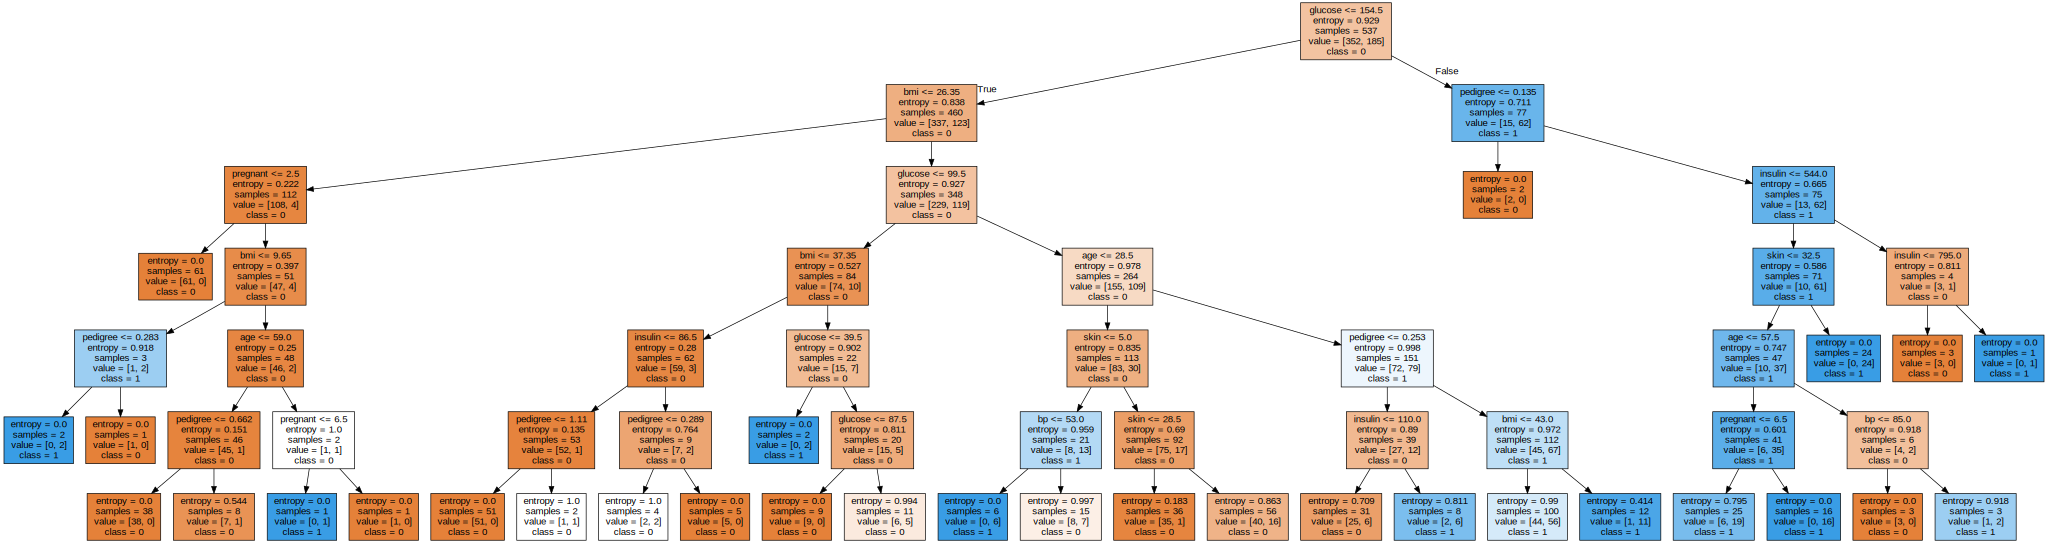

In [35]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Task

Read through the decision tree API https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html and re-run this code using a different value for the maximum depth (don't pick a value larger than 10). You will need to specify this new arguement in the function which creates the decision tree. Which maximum depth gave you the best test accuracy?

The max depth that gives good test accuracy was 5.

## Recap

*   Decision trees are easy to interpret and visualize.
*   There is no need to normalize data.
*   The model does not learn any parameters (we will learn about parameterised models later on). We simply induce a tree and that is it.
*   It is sensitive to noisy data

visualize.